In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def devil(N, D=2, K=3):
    N = 100
    D = 2
    K = 3
    X = np.zeros((N*K,D))
    Y = np.zeros(N*K,dtype='uint8')
    
    for j in range(K):
        ix = range(N * j, N * (j+1))
        r = np.linspace(0.0,1,N)
        t = np.linspace(j*4, (j +1) *4, N) + np.random.randn(N) * 0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    return X,Y

In [13]:
X, y = devil(300)

In [15]:
X[:, 0] += np.random.normal(loc = 0, scale=0.15, size=300)
X[:, 1] += np.random.normal(loc = 0, scale=0.15, size=300)

In [18]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#AAAAFF'])

x_min, x_max = (-1,1)
y_min, y_max = (-1,1)

h = 0.05

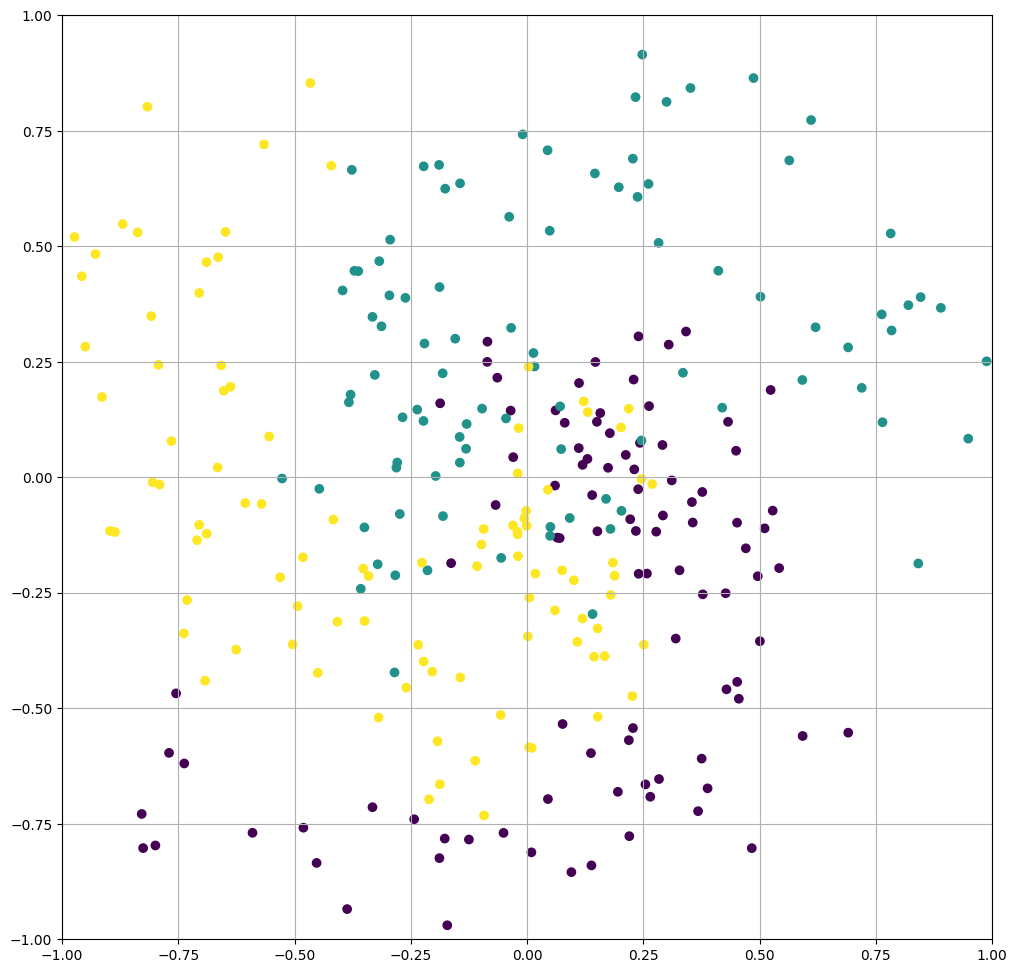

In [23]:
plt.figure(figsize=(12,12))

plt.scatter(X[:, 0],X[:,1], c = y)

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.grid(True)

plt.show()


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [33]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

print(f'Прцоент правильно угаданных ответов на обучающем множестве: {accuracy_score(y_train,y_train_pred)}')
print(f'Прцоент правильно угаданных ответов на тренеровочном множестве: {accuracy_score(y_test,y_test_pred)}')

Прцоент правильно угаданных ответов на обучающем множестве: 0.8666666666666667
Прцоент правильно угаданных ответов на тренеровочном множестве: 0.775


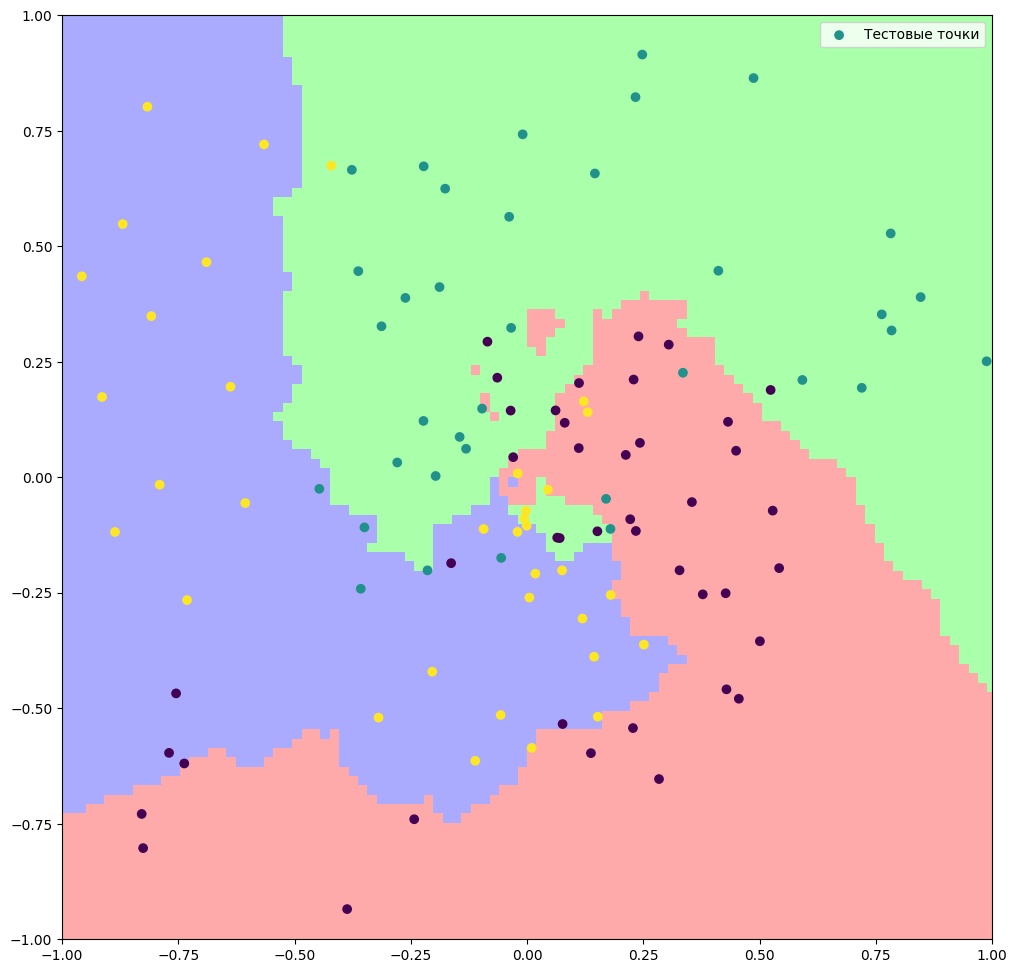

In [41]:
plt.figure(figsize=(12,12))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),np.linspace(y_min, y_max,100))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])

z = z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=cmap_light)
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, label = 'Тестовые точки')

plt.legend()

plt.show()